In [225]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.metrics import mean_squared_error,mean_absolute_error,accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split


import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv("avocado.csv")

In [3]:
data

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [5]:
data.drop(['Date'],axis=1,inplace=True)

In [6]:
data

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...
7,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
8,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
9,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
10,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
le=LabelEncoder()

In [10]:
data['type']=le.fit_transform(data['type'])

In [11]:
data['region']=le.fit_transform(data['region'])

In [12]:
data

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0
...,...,...,...,...,...,...,...,...,...,...,...,...
7,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,53
8,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,53
9,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,53
10,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,53


In [13]:
df=pd.DataFrame(data=data)

In [14]:
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0


In [15]:
df.tail()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
7,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,53
8,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,53
9,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,53
10,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,53
11,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,1,2018,53


In [16]:
df.shape

(18249, 12)

In [17]:
df.dtypes

AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type              int32
year              int64
region            int32
dtype: object

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18249 entries, 0 to 11
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   Total Volume  18249 non-null  float64
 2   4046          18249 non-null  float64
 3   4225          18249 non-null  float64
 4   4770          18249 non-null  float64
 5   Total Bags    18249 non-null  float64
 6   Small Bags    18249 non-null  float64
 7   Large Bags    18249 non-null  float64
 8   XLarge Bags   18249 non-null  float64
 9   type          18249 non-null  int32  
 10  year          18249 non-null  int64  
 11  region        18249 non-null  int32  
dtypes: float64(9), int32(2), int64(1)
memory usage: 1.7 MB


In [19]:
df.isnull().sum()

AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

<AxesSubplot:>

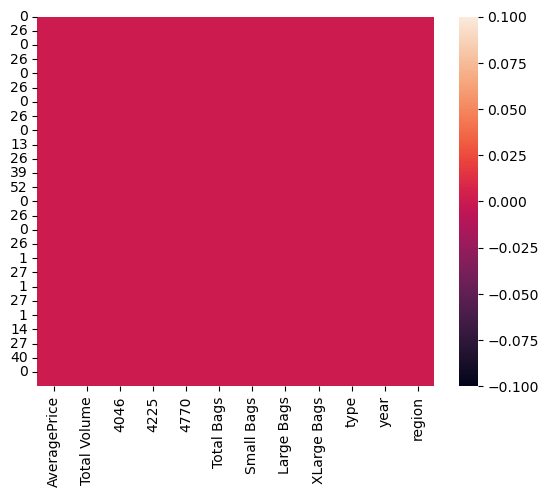

In [20]:
sns.heatmap(df.isnull())

No null data is present in dataset(df)

In [21]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,0.499918,2016.147899,26.495644
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.500014,0.939938,15.583788
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,2015.000000,0.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,0.000000,2015.000000,13.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,0.000000,2016.000000,26.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,1.000000,2017.000000,40.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,1.000000,2018.000000,53.000000


key observations-

1- No skewness in datasets as mean is not more then median(50%).

2- outliers are present in data(df) as there is difference in 75% and max

In [22]:
df.skew()

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
type             0.000329
year             0.215339
region           0.000030
dtype: float64

array([[<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>]], dtype=object)

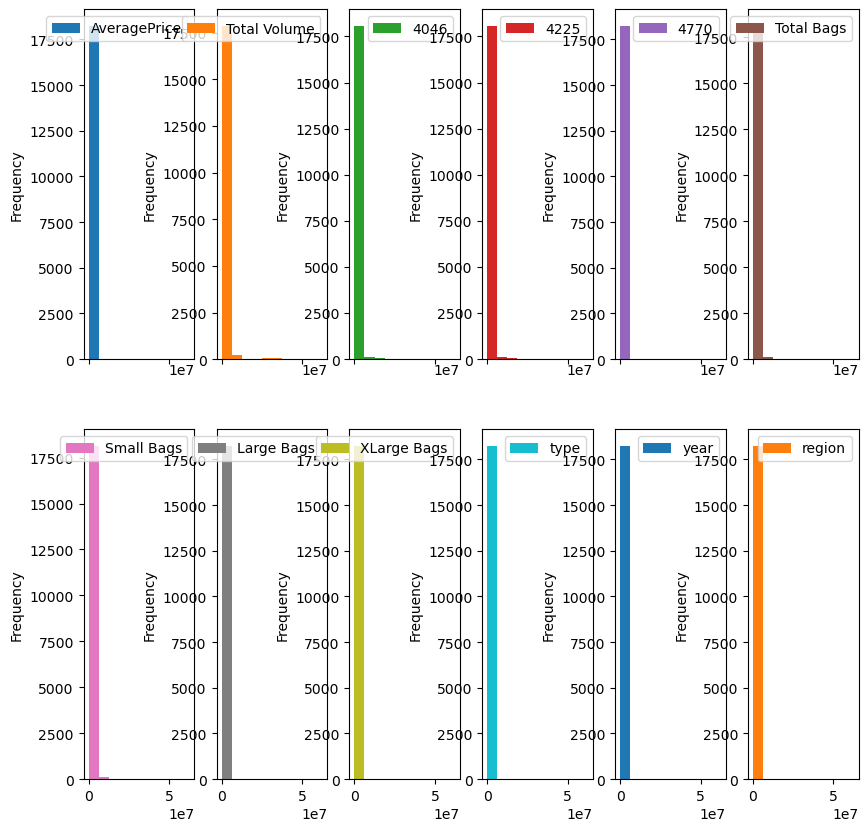

In [23]:
df.plot(kind="hist",subplots=True,layout=(2,6),figsize=(10,10))

from the above graphical visualisation we get to know there is no skewness present in dataset(df)

AveragePrice       AxesSubplot(0.125,0.53;0.110714x0.35)
Total Volume    AxesSubplot(0.257857,0.53;0.110714x0.35)
4046            AxesSubplot(0.390714,0.53;0.110714x0.35)
4225            AxesSubplot(0.523571,0.53;0.110714x0.35)
4770            AxesSubplot(0.656429,0.53;0.110714x0.35)
Total Bags      AxesSubplot(0.789286,0.53;0.110714x0.35)
Small Bags         AxesSubplot(0.125,0.11;0.110714x0.35)
Large Bags      AxesSubplot(0.257857,0.11;0.110714x0.35)
XLarge Bags     AxesSubplot(0.390714,0.11;0.110714x0.35)
type            AxesSubplot(0.523571,0.11;0.110714x0.35)
year            AxesSubplot(0.656429,0.11;0.110714x0.35)
region          AxesSubplot(0.789286,0.11;0.110714x0.35)
dtype: object

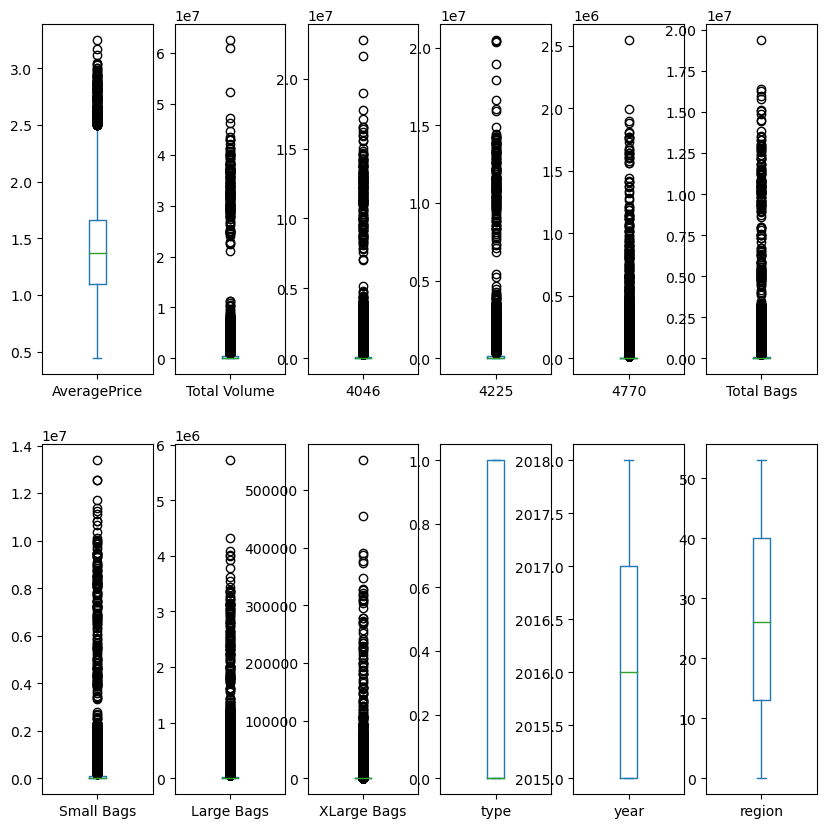

In [24]:
df.plot(kind="box",subplots=True,layout=(2,6),figsize=(10,10))

from this above visualization  we get to know that outliers are present in dataset 

In [25]:
from scipy.stats import zscore

In [26]:
z=np.abs(zscore(df))

In [27]:
z

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.188689,0.227716,0.230816,0.199902,0.212091,0.234170,0.232647,0.222352,0.17558,0.999836,1.221282,1.700252
1,0.139020,0.230427,0.231103,0.208054,0.211997,0.233350,0.231568,0.222335,0.17558,0.999836,1.221282,1.700252
2,1.182069,0.212085,0.231007,0.154478,0.211325,0.234730,0.233399,0.222311,0.17558,0.999836,1.221282,1.700252
3,0.809551,0.223444,0.230741,0.185350,0.211864,0.237096,0.236568,0.222186,0.17558,0.999836,1.221282,1.700252
4,0.312861,0.231538,0.230891,0.208719,0.211834,0.236718,0.236154,0.221924,0.17558,0.999836,1.221282,1.700252
...,...,...,...,...,...,...,...,...,...,...,...,...
7,0.556347,0.241373,0.230017,0.243857,0.212540,0.229301,0.226665,0.220964,0.17558,1.000164,1.970504,1.700811
8,0.755023,0.242296,0.230693,0.242277,0.212540,0.233594,0.232196,0.221403,0.17558,1.000164,1.970504,1.700811
9,1.152375,0.242331,0.230693,0.243090,0.205766,0.233463,0.231644,0.222561,0.17558,1.000164,1.970504,1.700811
10,1.301382,0.241625,0.230428,0.242651,0.205774,0.231866,0.229543,0.222529,0.17558,1.000164,1.970504,1.700811


In [28]:
threashold=3
print(np.where(z>3))

(array([  346,   359,   780, ..., 17304, 17402, 17428], dtype=int64), array([2, 2, 8, ..., 0, 0, 0], dtype=int64))


In [29]:
df_new=df[(z<3).all(axis=1)]

In [224]:
df_new

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0
...,...,...,...,...,...,...,...,...,...,...,...,...
7,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,53
8,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,53
9,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,53
10,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,53


In [33]:
df=df_new

In [34]:
df.shape

(17651, 12)

In [ ]:
#Predicting the price of acocado

In [85]:
x=df.iloc[:,1:]

In [86]:
x

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0
1,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0
2,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0
3,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0
4,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0
...,...,...,...,...,...,...,...,...,...,...,...
7,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,53
8,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,53
9,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,53
10,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,53


In [87]:
y=df.iloc[:,0]

In [90]:
y

0     1.33
1     1.35
2     0.93
3     1.08
4     1.28
      ... 
7     1.63
8     1.71
9     1.87
10    1.93
11    1.62
Name: AveragePrice, Length: 17651, dtype: float64

In [143]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [92]:
mms=MinMaxScaler()

In [112]:
x=mms.fit_transform(x)
x

array([[7.67147114e-03, 2.53738579e-04, 1.39814180e-02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [6.55222091e-03, 1.65027730e-04, 1.14611253e-02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.41269712e-02, 1.94500114e-04, 2.80244489e-02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [1.63615326e-03, 2.91718354e-04, 6.29759925e-04, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [1.92775069e-03, 3.73882232e-04, 7.65389424e-04, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [2.08133782e-03, 7.08485084e-04, 6.04942230e-04, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00]])

In [94]:
y.shape

(17651,)

In [113]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.30,random_state=48)

In [114]:
xtrain.shape

(12355, 11)

In [115]:
ytrain.shape

(12355,)

In [116]:
lg=LinearRegression()

In [117]:
lg

LinearRegression()

In [118]:
lg.fit(xtrain,ytrain)

LinearRegression()

In [119]:
lg.score(xtrain,ytrain)

0.4082276855760495

In [120]:
lpred=lg.predict(xtest)

In [121]:
print("Mean squared error",mean_squared_error(ytest,lpred))
print("Mean absolute_error",mean_absolute_error(ytest,lpred))
print("Root mean Squared error",np.sqrt(mean_squared_error(ytest,lpred)))

Mean squared error 0.08680123213740361
Mean absolute_error 0.23104494192600142
Root mean Squared error 0.2946204883191317


In [127]:
#takeing the sample data
p=np.array([64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0])

In [128]:
p=p.reshape(1,-1)

In [129]:
p.shape

(1, 11)

In [130]:
lg.predict(p)

array([1.14023955e+08])

In [131]:
#predicting the region of avacado

In [133]:
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0


In [137]:
a=df.iloc[:,0:-1]

In [139]:
a.head(1)

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015


In [140]:
b=df.iloc[:,-1]

In [141]:
b

0      0
1      0
2      0
3      0
4      0
      ..
7     53
8     53
9     53
10    53
11    53
Name: region, Length: 17651, dtype: int32

In [144]:
ss=StandardScaler()

In [145]:
a=ss.fit_transform(a)

In [146]:
a

array([[-0.19535234, -0.3920086 , -0.34945151, ..., -0.25902684,
        -1.01904715, -1.21001338],
       [-0.1435096 , -0.40125088, -0.3502761 , ..., -0.25902684,
        -1.01904715, -1.21001338],
       [-1.2322071 , -0.33870193, -0.35000214, ..., -0.25902684,
        -1.01904715, -1.21001338],
       ...,
       [ 1.20440158, -0.44184559, -0.34909848, ..., -0.25902684,
         0.98130886,  1.98075592],
       [ 1.35992979, -0.43943771, -0.34833475, ..., -0.25902684,
         0.98130886,  1.98075592],
       [ 0.55636736, -0.43816945, -0.34522454, ..., -0.25902684,
         0.98130886,  1.98075592]])

In [147]:
a.mean()

9.904803471855094e-15

In [148]:
a.std()

1.0

In [213]:
atrain,atest,btrain,btest=train_test_split(a,b,test_size=.27,random_state=47)

In [166]:
atrain.shape

(12708, 11)

In [167]:
btrain.shape

(12708,)

In [168]:
lo=LogisticRegression()

In [169]:
lo

LogisticRegression()

In [170]:
lo.fit(atrain,btrain)

LogisticRegression()

In [171]:
l_pred=lo.predict(atest)

In [172]:
print("Accuracy score",accuracy_score(btest,l_pred))
print("confusion matrix",confusion_matrix(btest,l_pred))
print("Classification report",classification_report(btest,l_pred))

Accuracy score 0.39874570099130086
confusion matrix [[58  0  0 ...  0  0  0]
 [ 2 26  0 ...  0  0  0]
 [ 0  3 51 ...  0  0  0]
 ...
 [ 0  0  0 ... 24  4  0]
 [ 0  0  0 ...  2 49  0]
 [ 0  4  0 ...  0  0 36]]
Classification report               precision    recall  f1-score   support

           0       0.23      0.64      0.34        91
           1       0.25      0.30      0.28        86
           2       0.65      0.51      0.57       100
           3       0.25      0.48      0.33        96
           4       0.62      0.32      0.43       105
           5       0.38      0.32      0.35        93
           6       0.94      0.63      0.76        81
           7       0.20      0.38      0.26        97
           8       0.66      0.53      0.59        88
           9       0.35      0.46      0.40        82
          10       0.45      0.21      0.28       102
          11       0.38      0.55      0.45        82
          12       0.67      0.42      0.51       108
          13 

In [214]:
dtc=DecisionTreeClassifier()

In [215]:
dtc

DecisionTreeClassifier()

In [216]:
dtc.fit(atrain,btrain)

DecisionTreeClassifier()

In [217]:
dpred=dtc.predict(atest)

In [218]:
print("Accuracy score",accuracy_score(btest,dpred))
print("confusion matrix",confusion_matrix(btest,dpred))
print("Classification report",classification_report(btest,dpred))

Accuracy score 0.789760805707092
confusion matrix [[72  0  0 ...  0  0  0]
 [ 0 64  0 ...  0  0  0]
 [ 0  0 73 ...  0  0  2]
 ...
 [ 0  0  0 ... 42  0  0]
 [ 0  0  0 ...  0 54  0]
 [ 0  2  0 ...  0  0 76]]
Classification report               precision    recall  f1-score   support

           0       0.74      0.82      0.78        88
           1       0.76      0.66      0.71        97
           2       0.83      0.90      0.86        81
           3       0.82      0.81      0.81        84
           4       0.82      0.85      0.84        87
           5       0.71      0.71      0.71       108
           6       0.96      0.93      0.95        85
           7       0.85      0.82      0.83        88
           8       0.84      0.92      0.88       100
           9       0.72      0.82      0.77        88
          10       0.71      0.65      0.68        92
          11       0.84      0.82      0.83       105
          12       0.86      0.78      0.82        94
          13   

In [219]:
t=np.array([1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015])

In [220]:
t=t.reshape(1,-1)

In [221]:
t.shape

(1, 11)

In [222]:
dtc.predict(t)

array([6])

The model is predicting the value of region perfectely

hence the model is well trainied